In [ ]:
import pandas as pd
df_sms = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

df_sms

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#Find the most expensive Product
most_expensive_product = df_sms.loc[df_sms['Unit price'].idxmax()]

#Find the least expensive Product
least_expensive_product = df_sms.loc[df_sms['Unit price'].idxmin()]

print('Most Expensive Product:\n', most_expensive_product)
print('\nLeast Expensive Product:\n', least_expensive_product)

Most Expensive Product:
 Invoice ID                       219-22-9386
Branch                                     B
City                                Mandalay
Customer type                         Member
Gender                                  Male
Product line               Sports and travel
Unit price                             99.96
Quantity                                   9
Tax 5%                                44.982
Total                                944.622
Date                                3/9/2019
Time                                   17:26
Payment                          Credit card
cogs                                  899.64
gross margin percentage             4.761905
gross income                          44.982
Rating                                   4.2
Name: 122, dtype: object

Least Expensive Product:
 Invoice ID                       333-23-2632
Branch                                     A
City                                  Yangon
Customer type          

In [ ]:
#Find the most sold product
most_sold_product = df_sms['Product line'].value_counts().idxmax()

#Find the least sold product
least_sold_product = df_sms['Product line'].value_counts().idxmin()

print('Most Sold Product:', most_sold_product)
print('Least Sold Product:', least_sold_product)

Most Sold Product: Fashion accessories
Least Sold Product: Health and beauty


In [ ]:
#Most Sold Product
most_sold_product1 = df_sms.groupby('Product line')['Quantity'].sum().idxmax()

#Least Sold Product
least_sold_product1 = df_sms.groupby('Product line')['Quantity'].sum().idxmin()

print('Most Sold Product:', most_sold_product1)
print('Least Sold Product:', least_sold_product1)

Most Sold Product: Electronic accessories
Least Sold Product: Health and beauty


In [ ]:
#Highest Sales date
highest_sales_date = df_sms.groupby('Date')['Total'].sum().idxmax()

#Lowest Sales date
lowest_sales_date = df_sms.groupby('Date')['Total'].sum().idxmin()

print('Highest Sales Date:', highest_sales_date)
print('Lowest Sales Date:', lowest_sales_date)

Highest Sales Date: 3/9/2019
Lowest Sales Date: 2/13/2019


<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Date'>

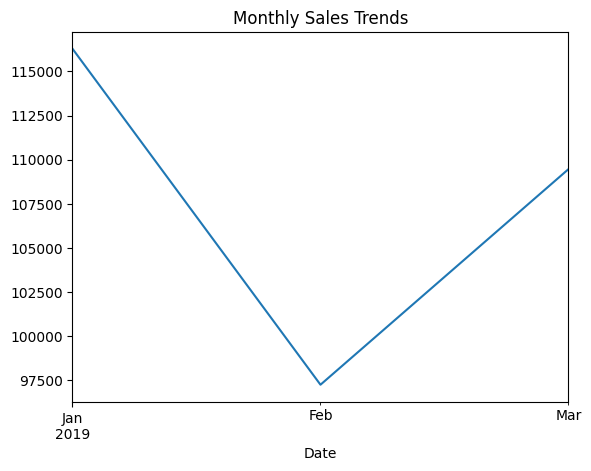

In [ ]:
#Sales Trends Over Time
df_sms['Date'] = pd.to_datetime(df_sms['Date'])
sales_trends = df_sms.groupby(df_sms['Date'].dt.to_period('M'))['Total'].sum()

sales_trends.plot(kind='line',title='Monthly Sales Trends')

<Axes: title={'center': 'Sales by Customer Type and Gender'}, xlabel='Customer type'>

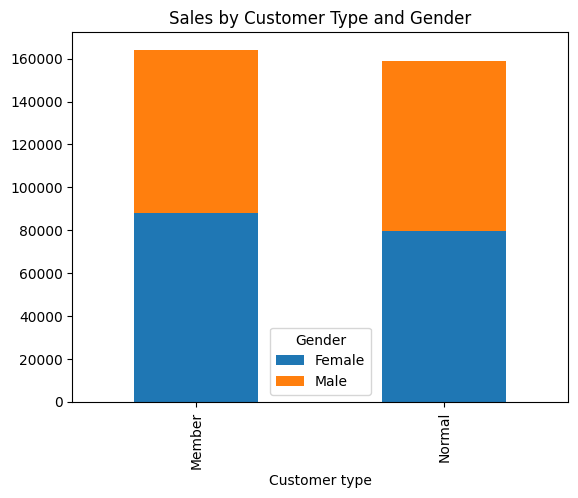

In [ ]:
#Customer demographics
customer_demographics = df_sms.groupby(['Customer type', 'Gender'])['Total'].sum().unstack()
customer_demographics.plot(kind='bar', stacked=True, title='Sales by Customer Type and Gender')

<Axes: title={'center': 'Payment Methods Distribution'}, ylabel='count'>

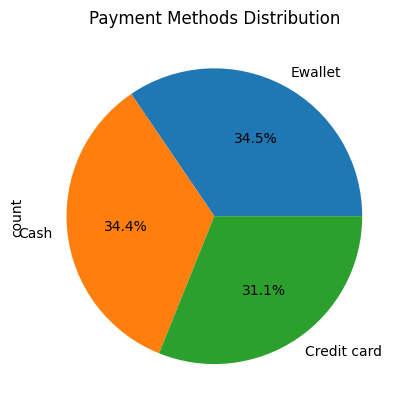

In [ ]:
#Payment Method Analysis:
payment_methods = df_sms['Payment'].value_counts()
payment_methods.plot(kind='pie', autopct='%1.1f%%', title='Payment Methods Distribution')

In [ ]:
#Customer Satisfaction
customer_satisfaction = df_sms['Rating'].describe()
print("Customer Satisfaction Summary:\n",customer_satisfaction)

Customer Satisfaction Summary:
 count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64


In [ ]:
customer_satisfaction = df_sms['Rating'].value_counts()
print("Customer Satisfaction Summary:\n", customer_satisfaction)

Customer Satisfaction Summary:
 Rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64


<Axes: title={'center': 'Sales by Branch'}, xlabel='Branch'>

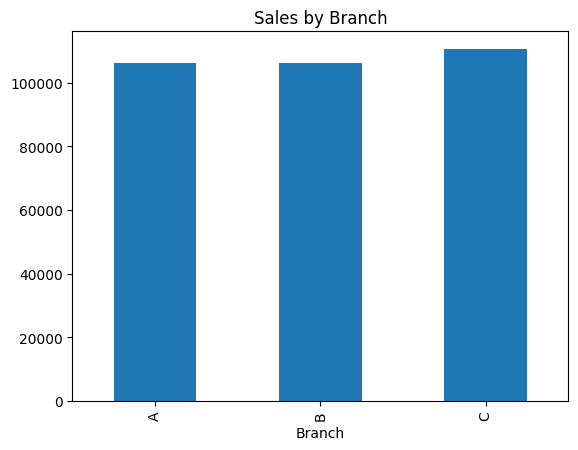

In [ ]:
#Branch Performance
branch_performance = df_sms.groupby('Branch')['Total'].sum()
branch_performance.plot(kind='bar', title='Sales by Branch')

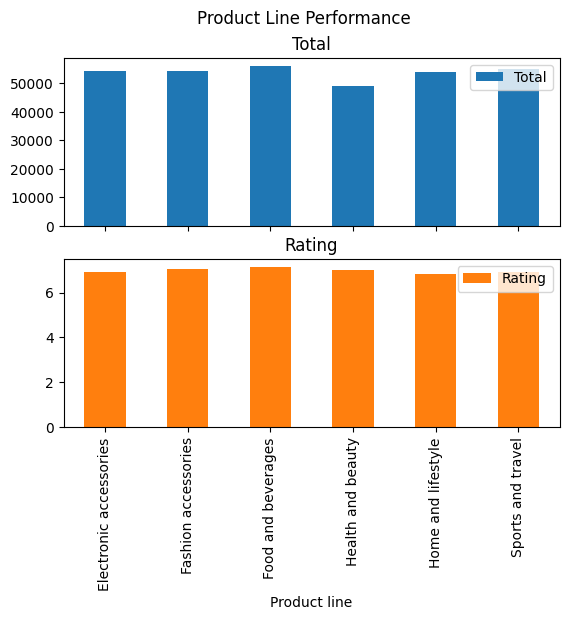

In [ ]:
#Product Line Performance
product_line_performance = df_sms.groupby('Product line').agg({'Total': 'sum', 'Rating': 'mean'})
plp = product_line_performance.plot(kind='bar', subplots=True, layout=(2, 1), title='Product Line Performance')


<Axes: title={'center': 'Sales by City'}, xlabel='City'>

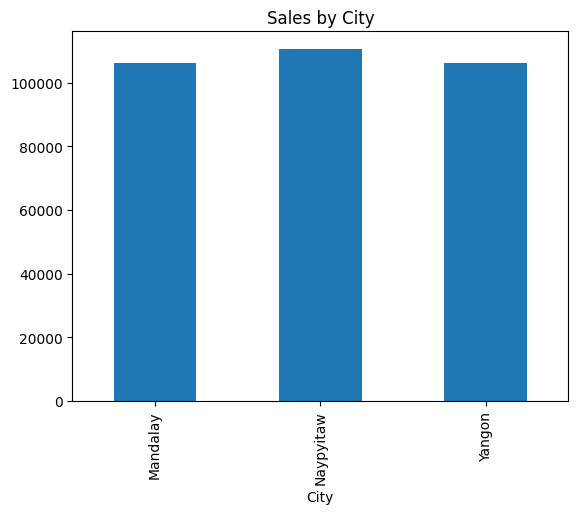

In [ ]:
#Sales by City
city_sales = df_sms.groupby('City')['Total'].sum()
city_sales.plot(kind='bar', title='Sales by City')

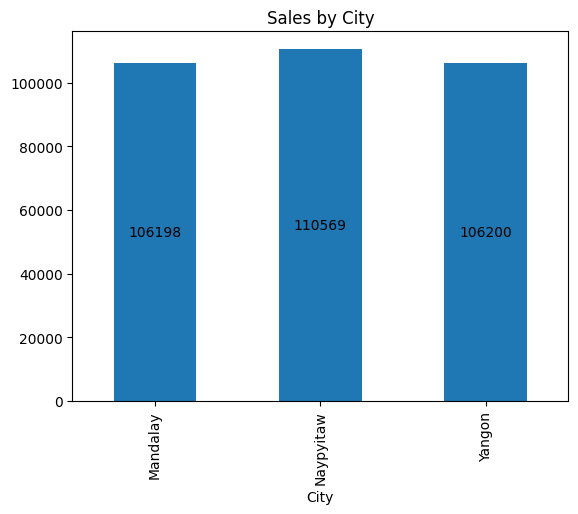

In [ ]:
city_sales = df_sms.groupby('City')['Total'].sum()

ax = city_sales.plot(kind='bar', title='Sales by City')

for i in ax.containers:
    ax.bar_label(i, label_type='center')

In [ ]:
#Sales by city
city_sales = df_sms.groupby('City')['Total'].sum()

print(city_sales)

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


In [ ]:
sales_per_city = df_sms.groupby('City').size().reset_index(name='Number of Sales')

print(sales_per_city)

        City  Number of Sales
0   Mandalay              332
1  Naypyitaw              328
2     Yangon              340


In [ ]:
#Sales by Gender
gender_sales = df_sms.groupby('Gender')['Total'].sum()

print(gender_sales)

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


In [ ]:
sales_by_gender = df_sms.groupby('Gender').size().reset_index(name='Number of Sales')

print(sales_by_gender)

   Gender  Number of Sales
0  Female              501
1    Male              499


In [ ]:
#Sales by customer type
customer_type_sales = df_sms.groupby('Customer type')['Total'].sum()

print(customer_type_sales)

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


In [ ]:
sales_by_customer_type = df_sms.groupby('Customer type').size().reset_index(name='Number of Sales')

print(sales_by_customer_type)

  Customer type  Number of Sales
0        Member              501
1        Normal              499


In [ ]:
#Popular product line for females
female_customers = df_sms[df_sms['Gender'] == 'Female']

popular_product_line_female = female_customers['Product line'].value_counts().idxmax()

print("Most Popular product line for females:", popular_product_line_female)

Most Popular product line for females: Fashion accessories


In [ ]:
popular_product_line_female1 = female_customers.groupby('Product line').size().idxmax()

print("Most Popular product line for females:", popular_product_line_female1)

Most Popular product line for females: Fashion accessories


In [ ]:
#Most Popular product line for males
male_customers = df_sms[df_sms['Gender'] == 'Male']

popular_product_line_male = male_customers['Product line'].value_counts().idxmax()

print("Most Popular product line for males:", popular_product_line_male)

Most Popular product line for males: Health and beauty


In [ ]:
popular_product_line_male1 = male_customers.groupby('Product line').size().idxmax()

print("Most Popular product line for males:", popular_product_line_male1)

Most Popular product line for males: Health and beauty


In [ ]:
#City with most female purchases
female_customers = df_sms[df_sms['Gender'] == 'Female']

city_with_most_female_purchases = female_customers['City'].value_counts().idxmax()

print("City with the most female purchases:", city_with_most_female_purchases)

City with the most female purchases: Naypyitaw


In [ ]:
city_with_most_female_purchases1 = female_customers.groupby('City')['Quantity'].sum().idxmax()

print("City with the most female purchases:", city_with_most_female_purchases1)

City with the most female purchases: Naypyitaw


In [ ]:
#City with most male purchases
male_customers = df_sms[df_sms['Gender'] == 'Male']

city_with_most_male_purchases = male_customers['City'].value_counts().idxmax()

print("City with the most male purchases:", city_with_most_male_purchases)

City with the most male purchases: Yangon


In [ ]:
city_with_most_male_purchases1 = male_customers.groupby('City')['Quantity'].sum().idxmax()

print("City with the most male purchases:", city_with_most_male_purchases1)

City with the most male purchases: Yangon


Here’s a summary of the analysis we performed on the supermarket sales data:

1. Most Expensive Product: With the Invoice ID(219-22-9386) a sports and travel product sold in Mandalay city. With a unit price of 99.96$ the product was bought by a Member is the most expensive product

2. Least Expensive Product: With the Invoice ID(333-23-2632) a Health and beauty product sold in Yangon city. With a unit price of 10.08$ the product was bought by a Member is the least expensive product.

3. Most Sold Product: Electronic accessories is the most sold product line based on the number of quantity sold

4. Least Sold Product: Health and beauty is the least sold product line based on number of quantity sold

5. Highest Sales Date: 3/9/2019 is the date with the highest total sales

6. Lowest Sales Date: 2/13/2019 is the date with the lowest total sales

7. Number of Sales per city was determined as follows:

1   Mandalay              (332)
2  Naypyitaw              (328)
3     Yangon              (340)

8. The number of Sales by Gender was determined, with females having more number of sales than males.

9. Similarly, sales for members and normal customers were determined. The sales for members is higher than that of the normal customers.

10. Most Popular product line for females is Fashion accessories.

11. Most Popular product line for males is Health and beauty.

12. City with the most female purchases is Naypyitaw.

13. City with the most male purchases is Yangon.

